In [1]:
# @title Imports

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
# @title Carregar dados

from google.colab import drive
drive.mount('/content/drive')

DATASET_PATH = '/content/drive/Shareddrives/AM/ml-100k/'


ratings = pd.read_csv(DATASET_PATH + 'u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])
movies = pd.read_csv(DATASET_PATH + 'u.item', sep='|', encoding='latin-1', header=None,
                     names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL',
                            'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
                            'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                            'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
users = pd.read_csv(DATASET_PATH + 'u.user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

Mounted at /content/drive


In [3]:
ratings.head(10)

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [4]:
movies.head(10)

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
users.head(10)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [6]:
print(f"Ratings shape: {ratings.shape}")
print(f"Movies shape: {movies.shape}")
print(f"Users shape: {users.shape}")

Ratings shape: (100000, 4)
Movies shape: (1682, 24)
Users shape: (943, 5)


In [7]:
# @title Divisão treino/teste

train, test = train_test_split(ratings, test_size=0.2, random_state=42)

In [8]:
n_users = ratings['user_id'].max()
n_movies = ratings['movie_id'].max()
train_matrix = np.zeros((n_users, n_movies))
for row in train.itertuples():
    train_matrix[row.user_id-1, row.movie_id-1] = row.rating

In [9]:
train_matrix

array([[0., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [10]:
print(f"Train shape: {train.shape}, Test shape: {test.shape}")

Train shape: (80000, 4), Test shape: (20000, 4)


In [11]:
# @title Matriz utilidade (apenas treino!)

utility_matrix = train.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)

In [12]:
utility_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,1668,1670,1671,1672,1673,1676,1678,1679,1680,1681
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,3.0,4.0,0.0,3.0,0.0,4.0,0.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
print(f"Utility matrix shape: {utility_matrix.shape}")

Utility matrix shape: (943, 1653)


In [14]:
# @title Selecionar gêneros relevantes (filtrar gêneros com poucas avaliações)

genre_cols = movies.columns[5:]
genre_sums = movies[genre_cols].sum()
selected_genres = genre_sums[genre_sums > 50].index

print(f"Selected genres ({len(selected_genres)}): {list(selected_genres)}")

Selected genres (13): ['Action', 'Adventure', "Children's", 'Comedy', 'Crime', 'Drama', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War']


In [15]:
# @title Extração dos recursos de gênero dos filmes
movie_features = movies[list(selected_genres)].values

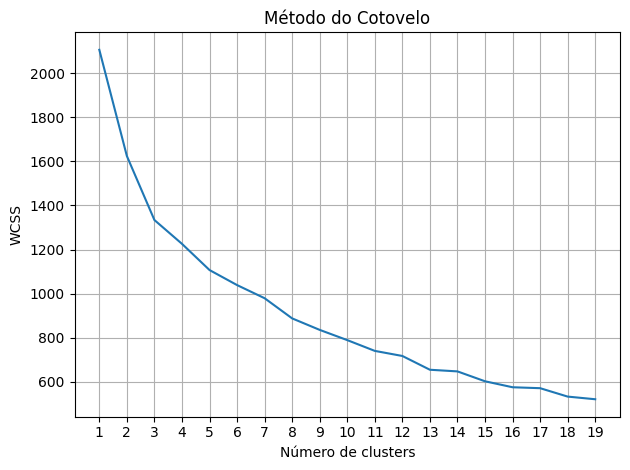

In [16]:
# @title Determinação ótima de K usando WCSS
wcss = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(movie_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.title('Método do Cotovelo')
plt.xticks(range(1, 20))
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# @title Clusterização dos filmes (apenas gêneros)
K = 3
topN = 3
kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
movies['cluster'] = kmeans.fit_predict(movie_features)

In [18]:
# @title Matriz utilidade clusterizada (usuário x cluster)

clustered_utility = pd.DataFrame(index=utility_matrix.index, columns=range(K))

for user in utility_matrix.index:
    for cluster in range(K):
        cluster_movies = movies[movies['cluster'] == cluster]['movie_id']
        cluster_movies_in_matrix = utility_matrix.columns.intersection(cluster_movies)
        ratings_in_cluster = utility_matrix.loc[user, cluster_movies_in_matrix]
        mean_rating = ratings_in_cluster[ratings_in_cluster > 0].mean() if (ratings_in_cluster > 0).any() else 0
        clustered_utility.loc[user, cluster] = mean_rating

clustered_utility = clustered_utility.fillna(0)

<ipython-input-18-cb3a3b8a83f8>:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clustered_utility = clustered_utility.fillna(0)


In [19]:
clustered_utility

,0,1,2
user_id,,,
1,3.594203,3.375000,4.040000
2,3.846154,3.111111,4.041667
3,2.500000,2.764706,3.000000
4,5.000000,4.181818,4.800000
5,3.000000,2.785714,2.588235
...,...,...,...
939,4.545455,3.636364,4.909091
940,3.444444,3.090909,3.645161
941,4.142857,4.285714,4.333333


In [20]:
# @title Normalização avançada
means = clustered_utility.mean(axis=1)
stds = clustered_utility.std(axis=1).replace(0, 1)
clustered_utility_norm = (clustered_utility.sub(means, axis=0)).div(stds, axis=0).fillna(0)

In [21]:
clustered_utility_norm

,0,1,2
user_id,,,
1,-0.222890,-0.869748,1.092638
2,0.366538,-1.131550,0.765012
3,-1.019020,0.039193,0.979827
4,0.795708,-1.122517,0.326809
5,1.013324,-0.027203,-0.986121
...,...,...,...
939,0.277350,-1.109400,0.832050
940,0.181528,-1.078329,0.896802
941,-1.120897,0.320256,0.800641


In [22]:
# @title Similaridade de usuários (Pearson)
user_similarity = pd.DataFrame(index=clustered_utility_norm.index, columns=clustered_utility_norm.index, dtype=float)

for u1 in clustered_utility_norm.index:
    for u2 in clustered_utility_norm.index:
        if u1 == u2:
            user_similarity.loc[u1, u2] = 1.0
        else:
            vec1 = clustered_utility_norm.loc[u1]
            vec2 = clustered_utility_norm.loc[u2]
            mask = (vec1 != 0) & (vec2 != 0)
            if mask.sum() < 2:
                sim = 0.0
            else:
                sim = pearsonr(vec1[mask], vec2[mask])[0]
                sim = 0.0 if np.isnan(sim) else sim
            user_similarity.loc[u1, u2] = sim

<ipython-input-22-eb6bfc7dae05>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  sim = pearsonr(vec1[mask], vec2[mask])[0]


In [23]:
user_similarity

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.869174,0.631819,0.578018,-0.639836,-0.055505,0.962109,0.304189,-0.971707,0.070304,...,0.826374,-0.027938,0.969814,-0.230806,0.505160,9.061052e-01,0.938647,4.230525e-01,0.526400,0.501533
2,0.869174,1.000000,0.165861,0.905927,-0.176095,-0.541987,0.701405,-0.206680,-0.727786,-0.432177,...,0.439795,-0.518597,0.722353,-0.681765,0.012300,9.967652e-01,0.986393,-8.036883e-02,0.037086,0.008103
3,0.631819,0.165861,1.000000,-0.267311,-0.999946,0.738852,0.819226,0.930577,-0.797017,0.817617,...,0.958604,0.757161,0.801756,0.608360,0.988115,2.445797e-01,0.325734,9.696292e-01,0.991622,0.987461
4,0.578018,0.905927,-0.267311,1.000000,0.257287,-0.846849,0.333614,-0.601527,-0.368928,-0.773368,...,0.018137,-0.831855,0.361585,-0.927401,-0.412259,8.689659e-01,0.823984,-4.948719e-01,-0.389545,-0.416079
5,-0.639836,-0.176095,-0.999946,0.257287,1.000000,-0.731813,-0.825139,-0.926724,0.803247,-0.811593,...,-0.961510,-0.750335,-0.807921,-0.600083,-0.986465,-2.546386e-01,-0.335537,-9.670363e-01,-0.990227,-0.985768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.906105,0.996765,0.244580,0.868966,-0.254639,-0.472693,0.756420,-0.127377,-0.780549,-0.358303,...,0.510551,-0.448202,0.775594,-0.620765,0.092623,1.000000e+00,0.996415,-3.330669e-16,0.117279,0.088443
940,0.938647,0.986393,0.325734,0.823984,-0.335537,-0.396447,0.809044,-0.043010,-0.830633,-0.278035,...,0.581464,-0.370969,0.826215,-0.552213,0.176527,9.964150e-01,1.000000,8.460007e-02,0.200875,0.172394
941,0.423052,-0.080369,0.969629,-0.494872,-0.967036,0.881227,0.654087,0.991854,-0.625095,0.933605,...,0.859847,0.893932,0.631233,0.783997,0.995701,-2.775558e-16,0.084600,1.000000e+00,0.993099,0.996081


In [24]:
# @title Função de predição

def guess(user_id, movie_id):

    if user_id not in utility_matrix.index:
        return train['rating'].mean()

    if movie_id not in utility_matrix.columns:
        user_ratings = utility_matrix.loc[user_id]
        user_avg = user_ratings[user_ratings > 0].mean()
        return user_avg if not np.isnan(user_avg) else train['rating'].mean()

    sims = user_similarity.loc[user_id].drop(labels=user_id, errors='ignore')
    sims = sims[sims > 0].sort_values(ascending=False).head(topN)
    ratings = []
    weights = []

    for neighbor, sim in sims.items():
        rating = utility_matrix.at[neighbor, movie_id] if movie_id in utility_matrix.columns else 0
        if rating > 0:
            ratings.append(rating)
            weights.append(sim)

    if not ratings or sum(weights) == 0:
        user_ratings = utility_matrix.loc[user_id]
        user_avg = user_ratings[user_ratings > 0].mean()
        return user_avg if not np.isnan(user_avg) else train['rating'].mean()

    return np.average(ratings, weights=weights)

In [25]:
# @title Predição e avaliação

y_true = []
y_pred = []

for _, row in test.iterrows():
    user_id = row['user_id']
    movie_id = row['movie_id']
    true_rating = row['rating']

    if user_id not in utility_matrix.index:
        pred_rating = train['rating'].mean()

    elif movie_id not in utility_matrix.columns:
        user_ratings = utility_matrix.loc[user_id]
        user_avg = user_ratings[user_ratings > 0].mean()
        pred_rating = user_avg if not np.isnan(user_avg) else train['rating'].mean()

    else:
        sims = user_similarity.loc[user_id].drop(labels=user_id, errors='ignore')
        sims = sims[sims > 0].sort_values(ascending=False).head(topN)

        ratings = []
        weights = []

        for neighbor, sim in sims.items():
            if movie_id in utility_matrix.columns:
                neighbor_rating = utility_matrix.at[neighbor, movie_id]
                if neighbor_rating > 0:
                    ratings.append(neighbor_rating)
                    weights.append(sim)

        if not ratings or sum(weights) == 0:
            user_ratings = utility_matrix.loc[user_id]
            user_avg = user_ratings[user_ratings > 0].mean()
            pred_rating = user_avg if not np.isnan(user_avg) else train['rating'].mean()
        else:
            pred_rating = np.average(ratings, weights=weights)

    y_true.append(true_rating)
    y_pred.append(pred_rating)

In [26]:
# @title Exemplo de recomendação

user_id_exemplo = 10
print(f"\nTop 5 filmes recomendados para o usuário {user_id_exemplo}:")

movie_ids = utility_matrix.columns
predicoes = [(mid, guess(user_id_exemplo, mid)) for mid in movie_ids if utility_matrix.loc[user_id_exemplo, mid] == 0]
predicoes.sort(key=lambda x: x[1], reverse=True)

for mid, score in predicoes[:5]:
    title = movies[movies['movie_id'] == mid]['movie_title'].values[0]
    print(f"{title}: {score:.2f}")


Top 5 filmes recomendados para o usuário 10:
Star Wars (1977): 5.00
Braveheart (1995): 5.00
Blade Runner (1982): 5.00
Independence Day (ID4) (1996): 5.00
Empire Strikes Back, The (1980): 5.00


In [27]:
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE (K=3, topN=3): {rmse:.6f}")

RMSE (K=3, topN=3): 1.092358


## Substituir o modelo baseado em KNN + média ponderada de similaridade por modelos de regressão supervisionada, como:

🔹 SVD (Singular Value Decomposition – método de fatoração da matriz)

🔹 MLPRegressor (perceptron multicamada do sklearn)

🔹 XGBoost (modelo gradient boosting de alta performance)

In [28]:
# @title Imports adicionais

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import TruncatedSVD
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [29]:
# @title Preparação dos dados para regressão

def prepare_supervised_data(df):
    data = []
    for _, row in df.iterrows():
        user = row['user_id']
        movie = row['movie_id']
        rating = row['rating']
        if user in clustered_utility.index and movie in utility_matrix.columns:
            features = list(clustered_utility.loc[user]) + list(user_similarity.loc[user])
            data.append((features, rating))
    X = np.array([x for x, _ in data])
    y = np.array([y for _, y in data])
    return X, y

In [30]:
X_train, y_train = prepare_supervised_data(train)
X_test, y_test = prepare_supervised_data(test)

In [31]:
# @title Modelo 1 - SVD + Regressão Linear

svd = TruncatedSVD(n_components=20, random_state=42)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

In [32]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_svd, y_train)
y_pred_svd = lr.predict(X_test_svd)
rmse_svd = np.sqrt(mean_squared_error(y_test, y_pred_svd))
print(f"[SVD + Regressão] RMSE: {rmse_svd:.6f}")

[SVD + Regressão] RMSE: 1.045265


In [33]:
# @title Modelo 2 - MLP Regressor

mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))

print(f"[MLP Regressor] RMSE: {rmse_mlp:.6f}")

[MLP Regressor] RMSE: 1.046069


In [34]:
# @title Modelo 3 - XGBoost

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, verbosity=0)
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6,
                   subsample=0.8, colsample_bytree=0.8, verbosity=0)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"[XGBoost] RMSE: {rmse_xgb:.6f}")

[XGBoost] RMSE: 1.041726


<ipython-input-35-1d317fbd8ee1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=rmse_scores, palette='viridis')


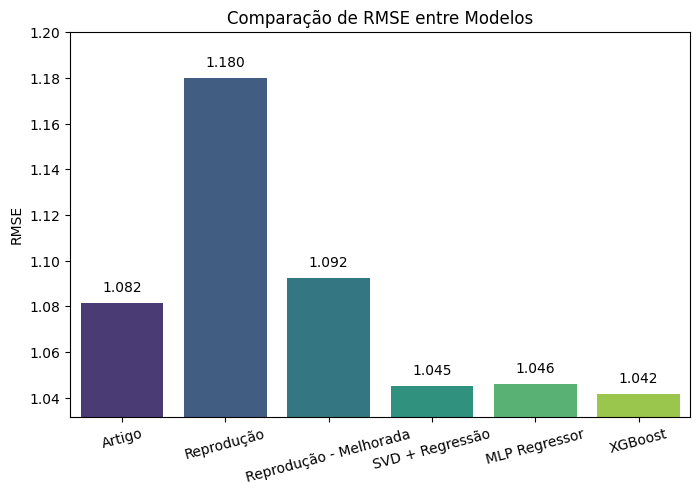

In [35]:
# @title Comparação de RMSE entre os modelos

import seaborn as sns

model_names = ['Artigo', 'Reprodução', 'Reprodução - Melhorada', 'SVD + Regressão', 'MLP Regressor', 'XGBoost']
rmse_scores = [1.081648, 1.180143, rmse, rmse_svd, rmse_mlp, rmse_xgb]

plt.figure(figsize=(8,5))
sns.barplot(x=model_names, y=rmse_scores, palette='viridis')
plt.title('Comparação de RMSE entre Modelos')
plt.ylabel('RMSE')
plt.ylim(min(rmse_scores) - 0.01, max(rmse_scores) + 0.02)
for i, score in enumerate(rmse_scores):
    plt.text(i, score + 0.005, f"{score:.3f}", ha='center')
plt.xticks(rotation=15)
plt.show()